# Projet 4 : Réalisez une étude de santé publique avec R ou Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
aide = pd.read_csv('Data/aide_alimentaire.csv',delimiter= ",")

In [3]:
aide.head(5) 

Pays bénéficiaire  Année              Produit  Valeur
0       Afghanistan   2013  Autres non-céréales     682
1       Afghanistan   2014  Autres non-céréales     335
2       Afghanistan   2013         Blé et Farin   39224
3       Afghanistan   2014         Blé et Farin   15160
4       Afghanistan   2013             Céréales   40504

In [4]:
population = pd.read_csv('Data/population.csv',delimiter= ",")

In [5]:
population.head(5)

Zone  Année     Valeur
0  Afghanistan   2013  32269.589
1  Afghanistan   2014  33370.794
2  Afghanistan   2015  34413.603
3  Afghanistan   2016  35383.032
4  Afghanistan   2017  36296.113

In [6]:
population['Valeur'] = population['Valeur']* 1000
population.head()

Zone  Année      Valeur
0  Afghanistan   2013  32269589.0
1  Afghanistan   2014  33370794.0
2  Afghanistan   2015  34413603.0
3  Afghanistan   2016  35383032.0
4  Afghanistan   2017  36296113.0

In [7]:
sn = pd.read_csv('Data/sous_nutrition.csv',delimiter = ",")
sn

Zone      Année Valeur
0     Afghanistan  2012-2014    8.6
1     Afghanistan  2013-2015    8.8
2     Afghanistan  2014-2016    8.9
3     Afghanistan  2015-2017    9.7
4     Afghanistan  2016-2018   10.5
...           ...        ...    ...
1213     Zimbabwe  2013-2015    NaN
1214     Zimbabwe  2014-2016    NaN
1215     Zimbabwe  2015-2017    NaN
1216     Zimbabwe  2016-2018    NaN
1217     Zimbabwe  2017-2019    NaN

[1218 rows x 3 columns]

In [8]:
sn['Valeur']=pd.to_numeric(sn['Valeur'],errors='coerce')
sn['Valeur']= sn['Valeur'].fillna(0)
sn['Valeur']= sn['Valeur']*1000000
sn

Zone      Année      Valeur
0     Afghanistan  2012-2014   8600000.0
1     Afghanistan  2013-2015   8800000.0
2     Afghanistan  2014-2016   8900000.0
3     Afghanistan  2015-2017   9700000.0
4     Afghanistan  2016-2018  10500000.0
...           ...        ...         ...
1213     Zimbabwe  2013-2015         0.0
1214     Zimbabwe  2014-2016         0.0
1215     Zimbabwe  2015-2017         0.0
1216     Zimbabwe  2016-2018         0.0
1217     Zimbabwe  2017-2019         0.0

[1218 rows x 3 columns]

In [9]:
dispo = pd.read_csv('Data/dispo_alimentaire.csv',delimiter= ",")

In [10]:
dispo.head(5)

Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    NaN   
1  Afghanistan        Agrumes, Autres  vegetale                    NaN   
2  Afghanistan  Aliments pour enfants  vegetale                    NaN   
3  Afghanistan                 Ananas  vegetale                    NaN   
4  Afghanistan                Bananes  vegetale                    NaN   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  NaN                                             5.0   
1                  NaN                                             1.0   
2                  NaN                                             1.0   
3                  NaN                                             0.0   
4                  NaN                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.72        
1                                               1.29        
2                                               0.06        
3                                               0.00        
4                                               2.70        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                               0.20               
1                                               0.01               
2                                               0.01               
3                                                NaN               
4                                               0.02               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.77          
1                                               0.02          
2                                               0.03          
3                                                NaN          
4                                               0.05          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                      53.0                      NaN                      NaN   
1                      41.0                      2.0                     40.0   
2                       2.0                      NaN                      2.0   
3                       0.0                      NaN                      0.0   
4                      82.0                      NaN                     82.0   

   Nourriture  Pertes  Production  Semences  Traitement  Variation de stock  
0        53.0     NaN        53.0       NaN         NaN                 NaN  
1        39.0     2.0         3.0       NaN         NaN                 NaN  
2         2.0     NaN         NaN       NaN         NaN                 NaN  
3         0.0     NaN         NaN       NaN         NaN                 NaN  
4        82.0     NaN         NaN       NaN         NaN                 NaN

In [11]:
df_merged_sous_nutrition = pd.merge(population[population['Année'] == 2017], sn[sn['Année'] == "2016-2018"], on=('Zone'))
df_merged_sous_nutrition


Zone  Année_x    Valeur_x    Année_y  \
0                               Afghanistan     2017  36296113.0  2016-2018   
1                            Afrique du Sud     2017  57009756.0  2016-2018   
2                                   Albanie     2017   2884169.0  2016-2018   
3                                   Algérie     2017  41389189.0  2016-2018   
4                                 Allemagne     2017  82658409.0  2016-2018   
..                                      ...      ...         ...        ...   
198  Venezuela (République bolivarienne du)     2017  29402484.0  2016-2018   
199                                Viet Nam     2017  94600648.0  2016-2018   
200                                   Yémen     2017  27834819.0  2016-2018   
201                                  Zambie     2017  16853599.0  2016-2018   
202                                Zimbabwe     2017  14236595.0  2016-2018   

       Valeur_y  
0    10500000.0  
1     3100000.0  
2      100000.0  
3     1300000.0  
4           0.0  
..          ...  
198   8000000.0  
199   6500000.0  
200         0.0  
201         0.0  
202         0.0  

[203 rows x 5 columns]

In [12]:
df_merged_sous_nutrition.rename(columns={"Valeur_x":"population","Valeur_y":"sous_nutrition","Année_x":"Annee","Année_y":"Annee"},inplace=True)
df_merged_sous_nutrition

Zone Annee  population      Annee  \
0                               Afghanistan  2017  36296113.0  2016-2018   
1                            Afrique du Sud  2017  57009756.0  2016-2018   
2                                   Albanie  2017   2884169.0  2016-2018   
3                                   Algérie  2017  41389189.0  2016-2018   
4                                 Allemagne  2017  82658409.0  2016-2018   
..                                      ...   ...         ...        ...   
198  Venezuela (République bolivarienne du)  2017  29402484.0  2016-2018   
199                                Viet Nam  2017  94600648.0  2016-2018   
200                                   Yémen  2017  27834819.0  2016-2018   
201                                  Zambie  2017  16853599.0  2016-2018   
202                                Zimbabwe  2017  14236595.0  2016-2018   

     sous_nutrition  
0        10500000.0  
1         3100000.0  
2          100000.0  
3         1300000.0  
4               0.0  
..              ...  
198       8000000.0  
199       6500000.0  
200             0.0  
201             0.0  
202             0.0  

[203 rows x 5 columns]

In [13]:
# la proportion de personnes en état de sous-nutrition 
"{:.2f}%".format((df_merged_sous_nutrition["sous_nutrition"].sum() / df_merged_sous_nutrition["population"].sum()) * 100)
print("la proportion de personnes en état de sous-nutrition est :","{:.2f}%".format((df_merged_sous_nutrition["sous_nutrition"].sum() / df_merged_sous_nutrition["population"].sum()) * 100)
)

la proportion de personnes en état de sous-nutrition est : 7.10%


In [14]:
population.rename(columns={"Valeur":"population", "Année":"Annee"},inplace=True)
population.head()

Zone  Annee  population
0  Afghanistan   2013  32269589.0
1  Afghanistan   2014  33370794.0
2  Afghanistan   2015  34413603.0
3  Afghanistan   2016  35383032.0
4  Afghanistan   2017  36296113.0

In [15]:
#le nombre théorique de personnes qui pourraient être nourries. Tu devrais pouvoir calculer ça à partir de la disponibilité alimentaire mondiale

In [16]:
# Ajout de la colonne population à la table nutrition
dispo_alimentaire = dispo.merge(population.loc[population['Annee'] == 2017,["Zone","population"]], on='Zone') 
dispo_alimentaire.head()

Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    NaN   
1  Afghanistan        Agrumes, Autres  vegetale                    NaN   
2  Afghanistan  Aliments pour enfants  vegetale                    NaN   
3  Afghanistan                 Ananas  vegetale                    NaN   
4  Afghanistan                Bananes  vegetale                    NaN   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  NaN                                             5.0   
1                  NaN                                             1.0   
2                  NaN                                             1.0   
3                  NaN                                             0.0   
4                  NaN                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.72        
1                                               1.29        
2                                               0.06        
3                                               0.00        
4                                               2.70        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                               0.20               
1                                               0.01               
2                                               0.01               
3                                                NaN               
4                                               0.02               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.77          
1                                               0.02          
2                                               0.03          
3                                                NaN          
4                                               0.05          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                      53.0                      NaN                      NaN   
1                      41.0                      2.0                     40.0   
2                       2.0                      NaN                      2.0   
3                       0.0                      NaN                      0.0   
4                      82.0                      NaN                     82.0   

   Nourriture  Pertes  Production  Semences  Traitement  Variation de stock  \
0        53.0     NaN        53.0       NaN         NaN                 NaN   
1        39.0     2.0         3.0       NaN         NaN                 NaN   
2         2.0     NaN         NaN       NaN         NaN                 NaN   
3         0.0     NaN         NaN       NaN         NaN                 NaN   
4        82.0     NaN         NaN       NaN         NaN                 NaN   

   population  
0  36296113.0  
1  36296113.0  
2  36296113.0  
3  36296113.0  
4  36296113.0

In [17]:
#nombre théorique de personnes qui pourraient être nourries =  Disponibilité alimentaire (Kcal/personne/jour) en 2017 / kcal journalier d'un homme(2400) * 1000 / population_mondiale_2017 
#On calcul la disponibilité alimentaire annuel (Kcal/personne/jour) de de la population / On multiplie par 1000 pour arrondir le resultat
dispo_alimentaire_an = dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_alimentaire["population"]*365
print('Disponibilité par an en Kcal : ',dispo_alimentaire_an.sum())

Disponibilité par an en Kcal :  7635429388975815.0


In [18]:
# Total d'humain nourrissable
total_humain_nourris = dispo_alimentaire_an.sum()/((2500*365))
print("Total d'humain nourrissable : ",total_humain_nourris)

Total d'humain nourrissable :  8367593850.9324


In [19]:
# Proportion d'humain nourrissable.
pro_humain_nourris = (total_humain_nourris/population.loc[population['Annee'] == 2017,"population"].sum())*100
print("Proportion d'humain nourrissable : ", pro_humain_nourris)
resultat = "{:.2f}%".format(pro_humain_nourris)
print("Proportion d'humain nourrissable en pourcentage",(resultat))


Proportion d'humain nourrissable :  110.85645442809752
Proportion d'humain nourrissable en pourcentage 110.86%


In [20]:
# Nombre et proportion d'humain nourrissable avec uniquement les produits végétaux.
dispo_alimentaire_an_veg = dispo_alimentaire.loc[dispo_alimentaire['Origine']=='vegetale','Disponibilité alimentaire (Kcal/personne/jour)']*dispo_alimentaire["population"]*365
total_humain_nourris_veg = dispo_alimentaire_an_veg.sum()/((2500*365))
print("Total d'humain nourrissable : ",total_humain_nourris_veg)
pro_humain_nourris_veg = (total_humain_nourris_veg/population.loc[population['Annee'] == 2017,"population"].sum())*100

resultat = "{:.2f}%".format(pro_humain_nourris_veg)
print("Proportion d'humain nourrissable avec des produits végétaux en pourcentage",(resultat))

Total d'humain nourrissable :  6904305684.6004
Proportion d'humain nourrissable avec des produits végétaux en pourcentage 91.47%


In [21]:
#Calculons à partir de la disponibilité intérieure la part qui est attribuée à l’alimentation animale
#Calcul de la somme de la disponibilité intérieure exprimé en tonnes
#Calcul de la somme des aliments pour animaux exprimé en tonnes


dispo['Aliments pour animaux'] =pd.to_numeric(dispo['Aliments pour animaux'], errors='coerce')

dispo['Disponibilité intérieure'] = dispo['Disponibilité intérieure'].astype(float)
dispo['Aliments pour animaux'] = dispo['Aliments pour animaux'].astype(float)

total_en_tonnes_disponibilité_intérieur = dispo['Disponibilité intérieure'].sum()
total_en_tonnes_aliments_pour_animaux = dispo['Aliments pour animaux'].sum()
proportion_dédiée_aux_animaux = total_en_tonnes_aliments_pour_animaux / total_en_tonnes_disponibilité_intérieur

proportion_dédiée_aux_animaux_en_pourcentage = proportion_dédiée_aux_animaux * 100
resultat = "{:.2f}%".format(proportion_dédiée_aux_animaux_en_pourcentage)

print(proportion_dédiée_aux_animaux)
print("la disponibilité intérieure attribuée à l’alimentation animale",(resultat))




0.13242418464261427
la disponibilité intérieure attribuée à l’alimentation animale 13.24%


In [22]:
#Calculons à partir de l’utilisation de la disponibilité intérieure la part qui est attribuée aux pertes
#Calcul de la somme des pertes exprimé en tonnes

total_en_tonnes_pertes= dispo['Pertes'].sum()

proportion_dédiée_aux_pertes= total_en_tonnes_pertes / total_en_tonnes_disponibilité_intérieur
print(proportion_dédiée_aux_pertes)
proportion_dédiée_aux_pertes_en_pourcentage = proportion_dédiée_aux_pertes * 100
resultat = "{:.2f}%".format(proportion_dédiée_aux_pertes_en_pourcentage)
print("Les pertes représente",(resultat),"de tonnes de la disponibilité intérieur")



0.04606541541196999
Les pertes représente 4.61% de tonnes de la disponibilité intérieur


In [23]:
#disponibilité intérieure concrètement utilisée pour l'alimentation humaine
#Calcul de la somme de la part utilisée pour l'alimentation humaine exprimé en tonnes

total_en_tonnes_alimentation_humaine= dispo['Nourriture'].sum()

proportion_dédiée_aux_humains= total_en_tonnes_alimentation_humaine / total_en_tonnes_disponibilité_intérieur
proportion_dédiée_aux_humains_en_pourcentage = proportion_dédiée_aux_humains * 100
resultat = "{:.2f}%".format(proportion_dédiée_aux_humains_en_pourcentage)
print(proportion_dédiée_aux_humains)
print("disponibilité intérieure concrètement utilisée pour l'alimentation humaine :",resultat)

0.4951021393657058
disponibilité intérieure concrètement utilisée pour l'alimentation humaine : 49.51%


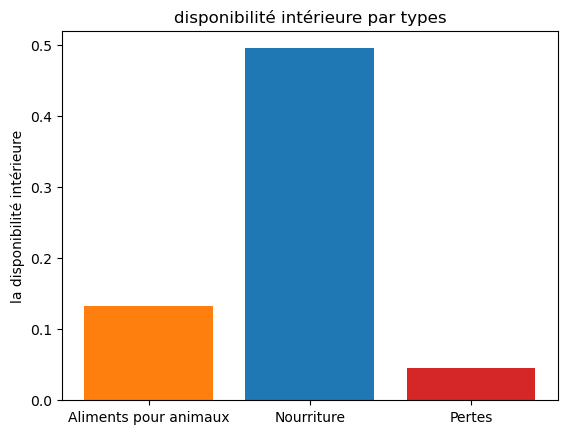

In [24]:
fig, ax = plt.subplots()


disponibilité_intérieure = ['Aliments pour animaux', 'Nourriture', 'Pertes']
counts = [proportion_dédiée_aux_animaux,proportion_dédiée_aux_humains,proportion_dédiée_aux_pertes]
bar_labels = ['red', 'blue','orange']
bar_colors = ['tab:orange', 'tab:blue', 'tab:red']

ax.bar(disponibilité_intérieure, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('la disponibilité intérieure')
ax.set_title('disponibilité intérieure par types')
#ax.legend(title='la proportionnalité de la la disponibilité intérieure')

plt.show()

#Demande de mélanie les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017,

In [25]:
#Population en état de sous nutrition
population_mondiale_2017= population.loc[population['Annee']==2017]
sous_nutrition2017= sn.loc[population['Annee']==2017]
pop_sous_nutrition2017= pd.merge(sous_nutrition2017,population_mondiale_2017,how='right',on='Zone')
pop_sous_nutrition2017["proportion_sous_nutrition"]= pop_sous_nutrition2017["Valeur"]/pop_sous_nutrition2017["population"]*100
pop_sous_nutrition2017 = pop_sous_nutrition2017.sort_values(by='proportion_sous_nutrition', ascending=False,ignore_index=True)
pop_sous_nutrition2017 = pop_sous_nutrition2017.fillna(0)
pop_sous_nutrition2017.head(10)

Zone      Année      Valeur  Annee  \
0                                       Haïti  2016-2018   5300000.0   2017   
1  République populaire démocratique de Corée  2016-2018  12000000.0   2017   
2                                  Madagascar  2016-2018  10500000.0   2017   
3                                     Libéria  2016-2018   1800000.0   2017   
4                                     Lesotho  2016-2018    800000.0   2017   
5                                       Tchad  2016-2018   5700000.0   2017   
6                                      Rwanda  2016-2018   4200000.0   2017   
7                                  Mozambique  2016-2018   9400000.0   2017   
8                                 Timor-Leste  2016-2018    400000.0   2017   
9                                 Afghanistan  2016-2018  10500000.0   2017   

   population  proportion_sous_nutrition  
0  10982366.0                  48.259182  
1  25429825.0                  47.188685  
2  25570512.0                  41.062924  
3   4702226.0                  38.279742  
4   2091534.0                  38.249438  
5  15016753.0                  37.957606  
6  11980961.0                  35.055619  
7  28649018.0                  32.810898  
8   1243258.0                  32.173531  
9  36296113.0                  28.928718

In [26]:
#ceux qui ont le plus bénéficié d’aide depuis 2013
# Grouper les données par pays et calculer le total de l'aide alimentaire reçue par chaque pays
# Trier les pays par ordre décroissant de montant d'aide reçue
aide_2013 = aide.groupby('Pays bénéficiaire').sum()['Valeur'].reset_index()
aide_2013 = aide_2013.sort_values(by='Valeur', ascending=False,ignore_index=True)
aide_2013.head(10)

Pays bénéficiaire   Valeur
0         République arabe syrienne  1858943
1                          Éthiopie  1381294
2                             Yémen  1206484
3                     Soudan du Sud   695248
4                            Soudan   669784
5                             Kenya   552836
6                        Bangladesh   348188
7                           Somalie   292678
8  République démocratique du Congo   288502
9                             Niger   276344

In [27]:
#Les pays qui ont le plus de disponibilité par habitant en 2017
#somme disponibilité alimentaire par pays (Zone):
pays_forte_disponibilité=dispo[["Zone","Disponibilité alimentaire (Kcal/personne/jour)"]].groupby('Zone').sum('Disponibilité alimentaire (Kcal/personne/jour)').astype(int)
pays_forte_disponibilité=pays_forte_disponibilité.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)
pays_forte_disponibilité.head(10)

Disponibilité alimentaire (Kcal/personne/jour)
Zone                                                                 
Autriche                                                         3770
Belgique                                                         3737
Turquie                                                          3708
États-Unis d'Amérique                                            3682
Israël                                                           3610
Irlande                                                          3602
Italie                                                           3578
Luxembourg                                                       3540
Égypte                                                           3518
Allemagne                                                        3503

In [28]:
#Les pays qui ont le moins de disponibilité par habitant en 2017
pays_faible_disponibilité=dispo[["Zone","Disponibilité alimentaire (Kcal/personne/jour)"]].groupby('Zone').sum('Disponibilité alimentaire (Kcal/personne/jour)').astype(int)
pays_faible_disponibilité=pays_faible_disponibilité.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)
pays_faible_disponibilité.head(10)

Disponibilité alimentaire (Kcal/personne/jour)
Zone                                                                                      
République centrafricaine                                                             1879
Zambie                                                                                1924
Madagascar                                                                            2056
Afghanistan                                                                           2087
Haïti                                                                                 2089
République populaire démocratique de Corée                                            2093
Tchad                                                                                 2109
Zimbabwe                                                                              2113
Ouganda                                                                               2126
Timor-Leste                                                                           2129

In [29]:
faostat = pd.read_csv('Data/FAOSTAT_data.csv',delimiter= ",")
faostat.head(5)

Code Domaine                      Domaine  Code zone (M49)         Zone  \
0          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
1          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
2          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
3          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
4          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   

   Code Élément                   Élément Code Produit (CPC)          Produit  \
0          5301  Disponibilité intérieure              S2807  Riz et produits   
1          5301  Disponibilité intérieure              S2807  Riz et produits   
2          5301  Disponibilité intérieure              S2807  Riz et produits   
3          5301  Disponibilité intérieure              S2807  Riz et produits   
4          5301  Disponibilité intérieure              S2807  Riz et produits   

   Code année  Année               Unité  Valeur Symbole  \
0        2015   2015  Milliers de tonnes     690       I   
1        2016   2016  Milliers de tonnes     600       I   
2        2017   2017  Milliers de tonnes     739       I   
3        2018   2018  Milliers de tonnes     797       I   
4        2019   2019  Milliers de tonnes     697       I   

  Description du Symbole  
0         Valeur imputée  
1         Valeur imputée  
2         Valeur imputée  
3         Valeur imputée  
4         Valeur imputée

In [30]:
repartition_cereal_alim_humain=faostat.loc[(faostat['Élément'] == 'Nourriture') & (faostat['Produit']=='Céréales, Autres')]
repartition_cereal_alim_humain=faostat["Valeur"].sum()
repartition_cereal_alim_humain

30999751

In [31]:
#Il y a un lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur
#les utilisations de la disponibilité intérieure, qui peut s’exprimer avec une équation du type :
#A1 + A2 + … = disponibilité intérieure = B1 + B2 + ...

Disponibilité intérieure = Production + Importations + Variation - Exportations = Nourriture + Aliments animaux + Semences + Pertes + Traitement + Autres utilisations


Pour 2017: cereale = 'Blé et produits','Céréales, Autres', 'Maïs et produits', 'Millet et produits','Orge et produits', 'Riz et produits', 'Avoine', 'Sorgho et produits', 'Seigle et produits'

In [32]:
Produit = pd.read_csv('Data/FAOSTAT_liste_des_produits.csv',delimiter= ",")
Produit.head(5)



Code Domaine                      Domaine  Code zone (M49)         Zone  \
0          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
1          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
2          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
3          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
4          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   

   Code Élément                                         Élément  \
0          5142                                      Nourriture   
1           664  Disponibilité alimentaire (Kcal/personne/jour)   
2          5142                                      Nourriture   
3           664  Disponibilité alimentaire (Kcal/personne/jour)   
4          5142                                      Nourriture   

  Code Produit (CPC)           Produit  Code année  Année               Unité  \
0              S2511   Blé et produits        2017   2017  Milliers de tonnes   
1              S2511   Blé et produits        2017   2017  Kcal/personne/jour   
2              S2807   Riz et produits        2017   2017  Milliers de tonnes   
3              S2807   Riz et produits        2017   2017  Kcal/personne/jour   
4              S2513  Orge et produits        2017   2017  Milliers de tonnes   

   Valeur Symbole Description du Symbole  
0    5944       I         Valeur imputée  
1    1404       E         Valeur estimée  
2     700       I         Valeur imputée  
3     181       E         Valeur estimée  
4      58       I         Valeur imputée

In [33]:
#Liste des produits choisit en haut sert de justif
Produit = pd.read_csv('Data/FAOSTAT_liste_des_produits.csv',delimiter= ",")
Produit['Produit']

0          Blé et produits
1          Blé et produits
2          Riz et produits
3          Riz et produits
4         Orge et produits
               ...        
2733    Millet et produits
2734    Sorgho et produits
2735    Sorgho et produits
2736      Céréales, Autres
2737      Céréales, Autres
Name: Produit, Length: 2738, dtype: object

In [34]:
#Dispo cereale 2017

liste_cereale2017 = ['Blé et produits','Céréales, Autres', 'Maïs et produits', 'Millet et produits','Orge et produits', 'Riz et produits', 'Avoine', 'Sorgho et produits', 'Seigle et produits']
df_cereale2017 = dispo[dispo["Produit"].isin(liste_cereale2017)].groupby("Zone").sum().reset_index() 
prop_list2017 = [df_cereale2017['Aliments pour animaux'].sum() / df_cereale2017["Disponibilité intérieure"].sum(),
df_cereale2017['Nourriture'].sum() / df_cereale2017["Disponibilité intérieure"].sum(),]
prop_list2017.append(1-prop_list2017[0]-prop_list2017[1])
#On affiche les resultats de 2017
prop_list2017

[0.6933506248526291, 0.18130550970683015, 0.12534386544054074]

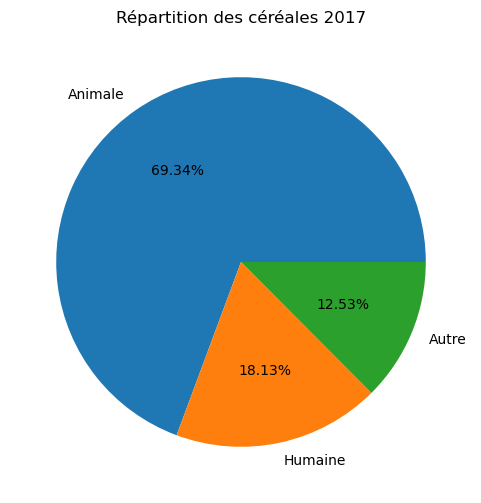

In [35]:
#On regle la taille du pie plot
plt.figure(figsize = (6, 6))
#On affiche le pie plot 
plt.pie(prop_list2017, labels = [ 'Animale','Humaine', 'Autre'],autopct = lambda x: str(round(x, 2)) + '%')
plt.title('Répartition des céréales 2017');

In [36]:
#On ajoute un index
#On crée la variable "exportation_manioc" qui correspond aux données de la Thailande sur le produit 'manioc'
exportation_manioc = dispo.loc[(dispo['Produit'] == "Manioc") & (dispo['Zone'] == "Thaïlande"),:]

#On affiche les données concernant le manioc en Thailande
exportation_manioc

Zone Produit   Origine  Aliments pour animaux  \
13809  Thaïlande  Manioc  vegetale                 1800.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
13809               2081.0                                            40.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
13809                                               13.0        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
13809                                               0.05               

       Disponibilité de protéines en quantité (g/personne/jour)  \
13809                                               0.14          

       Disponibilité intérieure  Exportations - Quantité  \
13809                    6264.0                  25214.0   

       Importations - Quantité  Nourriture  Pertes  Production  Semences  \
13809                   1250.0       871.0  1511.0     30228.0       NaN   

       Traitement  Variation de stock  
13809         0.0                 0.0

In [37]:
#je me souviens d’un exemple étonnant d’utilisation du manioc par la Thaïlande aux 
#égards de la proportion de personnes en sous-nutrition.
proportion_sous_nutrition_thailande = df_merged_sous_nutrition.loc[df_merged_sous_nutrition['Zone'] == 'Thaïlande']
proportion_sous_nutrition_thailande = (proportion_sous_nutrition_thailande['sous_nutrition'] / proportion_sous_nutrition_thailande['population']) * 100
proportion_sous_nutrition_thailande = proportion_sous_nutrition_thailande.apply(lambda x: "{:.2f}%".format(x))
print("La proportion de personnes en état de sous-nutrition est :", proportion_sous_nutrition_thailande.values[0])


La proportion de personnes en état de sous-nutrition est : 8.96%


In [38]:
#On affiche la proportion exportée à partir de la production
print("La proportion de manioc exportée est de:", "{:.2f}".format(exportation_manioc['Exportations - Quantité'].iloc[0]*100 /exportation_manioc['Production'].iloc[0]), "%")


La proportion de manioc exportée est de: 83.41 %


1kg de manioc = 1370 kcal selon mes recherches sur internet.

Source : https://cuisine.journaldesfemmes.fr/encyclopedie-produits/1955588-manioc/

Production x 1000000 = production en kilo, x 1370(kcal pour 1 kilo) / 2500(kcal theorique par personne par jour) /365 (nombre de jours dans une année)


In [39]:
#On affiche le nombre theorique de personnes qui pourraient etre nourries avec l'exportation de manioc en Thailande

print("Le nombre d'habitants qui pourraient etre nourries avec l'exportation de manioc en Thailande est:","{:.0f}".format(exportation_manioc['Exportations - Quantité'].iloc[0]*1000000*1370/2500/365),"habitants")


Le nombre d'habitants qui pourraient etre nourries avec l'exportation de manioc en Thailande est: 37855540 habitants
